<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.3 MB/s eta 0:00:00


In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten, GRU, SimpleRNN, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [2]:
from sklearn.model_selection import GroupKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

In [3]:
def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test, train_groups

## ML


will explain the best model in ML, which is

In [7]:
X_ica  = np.load('/content/drive/MyDrive/GP/GP-Data/X_ica2.npy')
y_ica = np.load('/content/drive/MyDrive/GP/GP-Data/y_ica2.npy')
y_ica = y_ica.astype('int')

X_ica.shape, y_ica.shape

((45, 32, 32), (45,))

In [8]:
np.unique(y_ica)

array([0, 1, 2])

In [9]:
# Load your dataset and split into training and testing sets
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y_ica, test_size=0.2, random_state=101)


y_train_ica[y_train_ica==0] = 1 #Stroke
y_train_ica[y_train_ica==2] = 0 #Healthy

y_test_ica[y_test_ica==0] = 1 #Stroke
y_test_ica[y_test_ica==2] = 0 #Healthy


np.unique(y_train_ica), np.unique(y_test_ica)


(array([0, 1]), array([0, 1]))

In [10]:
# Scale the data using StandardScaler
scaler = StandardScaler3D()
X_train_ica = scaler.fit_transform(X_train_ica)
X_test_ica = scaler.transform(X_test_ica)

# Flatten the data array for ML models
X_train_ica = X_train_ica.reshape(X_train_ica.shape[0], -1)
X_test_ica = X_test_ica.reshape(X_test_ica.shape[0], -1)
y_train_ica = y_train_ica.reshape(y_train_ica.shape[0], -1)
y_test_ica = y_test_ica.reshape(y_test_ica.shape[0], -1)


In [11]:
xgboost = XGBClassifier(max_depth=9, n_estimators=200, learning_rate=0.01)
xgboost.fit(X_train_ica, y_train_ica)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
import shap
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# # Set random seed for reproducibility
# np.random.seed(10)

# # Get a random sample of indices
# sample_indices = np.random.choice(len(X_train_ica), size=100, replace=False)

# # Use the sampled indices to select elements from X_train_ica
# X_sampled = X_train_ica[sample_indices]
X_sampled = X_train_ica


In [13]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_sampled)

In [14]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled[0])

In [16]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train_ica)

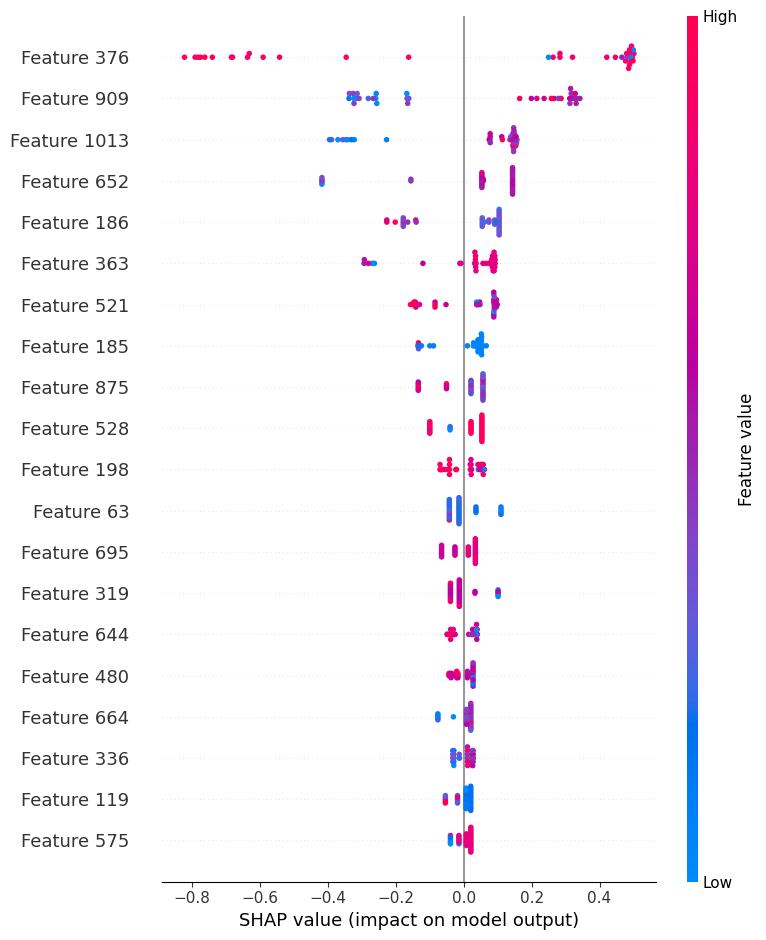

In [17]:
shap.summary_plot(shap_values, X_train_ica)

## DL